## Fashion MNIST - Introduction to CNNs with tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os

#Required for preventing ipy kernel crash
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
#Prevent error code: The kernel appears to have died. It will restart automatically.
#config = tf.compat.v1.ConfigProto()
#config.gpu_options.allow_growth = True

#sess = tf.compat.v1.Session(config=config)

### Load fashion_mnist from keras datasets

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
print(train_images.shape)

(60000, 28, 28)


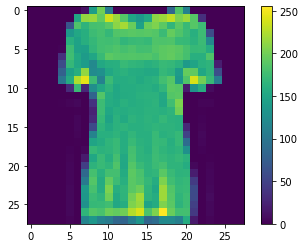

In [8]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
#Normalize images
train_images = train_images / 255.0
test_images = test_images / 255.0

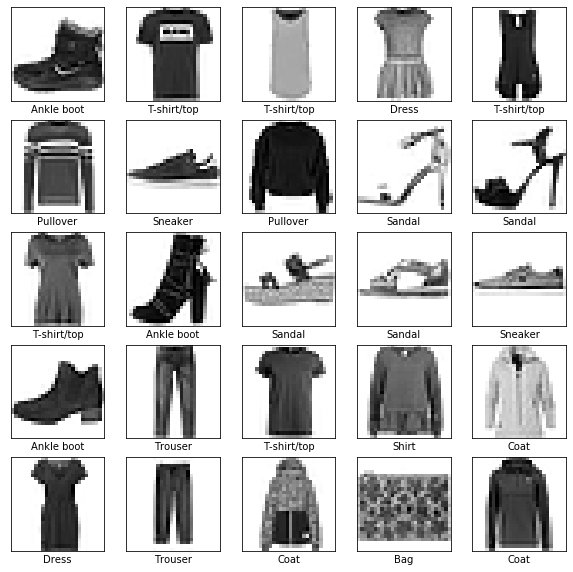

In [11]:
#Have a look at our first 25 pictures
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [12]:
#Building the Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #transform to one-dimensional array
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10) #output layer
])

In [13]:
model.compile(optimize='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.5094 - accuracy: 0.8208
Epoch 2/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.3776 - accuracy: 0.8644
Epoch 3/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3451 - accuracy: 0.8768
Epoch 4/10
60000/60000 [==============================] - 7s 125us/sample - loss: 0.3280 - accuracy: 0.8830
Epoch 5/10
60000/60000 [==============================] - 7s 125us/sample - loss: 0.3175 - accuracy: 0.8893
Epoch 6/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.3067 - accuracy: 0.8941
Epoch 7/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.3011 - accuracy: 0.8957
Epoch 8/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.2937 - accuracy: 0.9004
Epoch 9/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.2881 - accuracy: 0.9025
Epoch

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

10000/1 - 1s - loss: 0.2840 - accuracy: 0.8797


In [16]:
#Making Predictions; we convert logits to percent - easier to interpret class prediction percentages
probability_model = tf.keras.Sequential([model, keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [17]:
np.argmax(predictions[0]) #first predictions is class 9 = ankle boot
test_labels[0] #also 9 - model was correct

9

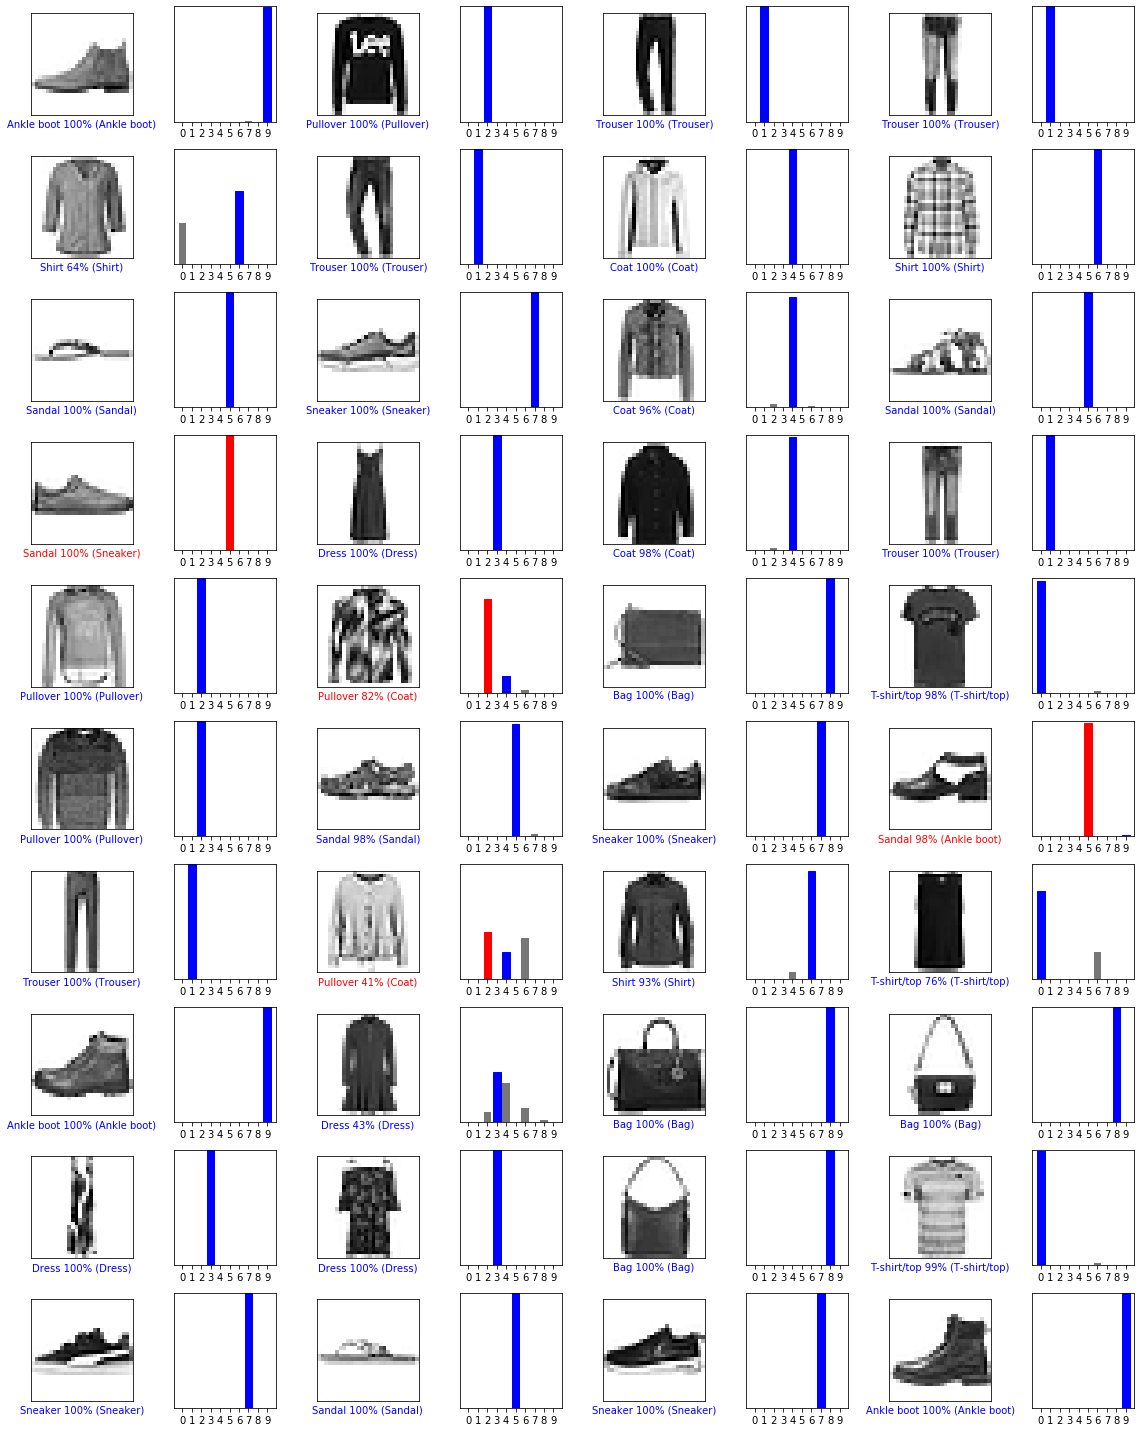

In [18]:
#Show prediction charts
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

num_rows = 10
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()